In [86]:
%pip install --upgrade pip
%pip install sklearn
%pip install scikit-learn
%pip install pandoc

C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1ef85ca1fa0>


C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedWriter name=10>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=11>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=12>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1ef846fa3a0>


Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1ef85cc0ca0>
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


  Using cached pandoc-2.1.tar.gz (29 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached plumbum-1.7.2-py2.py3-none-any.whl (117 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Created wheel for pandoc: filename=pandoc-2.1-py3-none-any.whl size=29537 sha256=46075ae4cc70f3b5117193a6d536ea0bf17a22ca357413a00a0ce9e338087b19
  Stored in directory: c:\users\windows 10\appdata\local\pip\cache\wheels\20\e3\a0\b21b97b236e86bfc68e8cfa4baba1a854212cb06772de592d9
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1ef85ccf880>


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from sklearn.preprocessing import LabelEncoder 
import csv

In [ ]:
$\bf{A.}$ Feature Engineering (45 marks): 
    
1. Prepare the data for downstream processes, e.g., dealing with missing values

PatientId     AppointmentID  Gender  ScheduledDay          AppointmentDay        Age  Neighbourhood   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
3.921784e+04  5751990        F       2016-05-31T10:56:41Z  2016-06-03T00:00:00Z  44   PRAIA DO SUÃ   0            0             0         0           0        0             No         1
7.346244e+13  5719885        F       2016-05-19T12:40:47Z  2016-05-30T00:00:00Z  5    CENTRO          0            0             0         0           0        1             No         1
7.345683e+13  5764698        F       2016-06-02T10:45:50Z  2016-06-02T00:00:00Z  36   BONFIM          0            0             0         0           0        0             No         1
              5726179        F       2016-05-20T13:14:48Z  2016-05-20T00:00:00Z  36   BONFIM          0            0             0         0           0        0             No         1
              5686158        F       2016-05-11T12:13:04Z  2016-05-11T

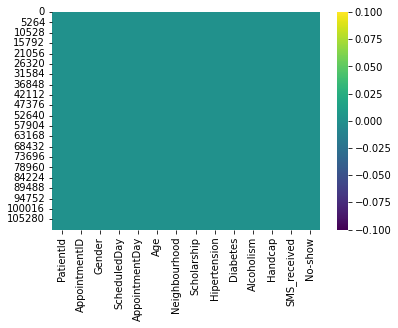

In [3]:
data = pd.read_excel(r'D:\Universities\uOttawa\IAI 5101\Assignments\MedicalCentre.xlsx')

#finding if null values exist
sns.heatmap(data.isnull(), cmap='viridis')

# finding the unique count
print(data.value_counts())

$ \bf{AnswerA. 1.}$ As we can see from the heatmap there are no missing values present in our dataset. We will see that further as we run the code below:

In [4]:
data.isnull().sum().any()

False

$\bf{A.2.}$ Determine the frequency of distinct values in each feature set

In [5]:
#remove accents from column Neighbourhood


data['Neighbourhood']= data['Neighbourhood'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
print(data.describe(include = 'all'))
print(data.columns)

           PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.000000   
unique         

$\bf{AnswerA. 2.} $
    After running value counts we can see that there are a total of:
    1. 62299 values for PatientID
    2. 110527 for AppointmentID
    3. 2 for Gender
    4. 103549 for ScheduledDay
    5. 27 for AppointmentDay
    6. 104 for Age
    7. 81 for Neighbourhood
    8. 2 for Scholarship
    9. 2 for Hipertension
    10. 2 for Diabetes
    11. 2 for Alcoholism
    12. 5 for Handcap
    13. 2 for SMS_received
    14. 2 for No-Show
   

In [ ]:
column_frequency = []
column_name = []
for column in data:
    columnSeriesObj = data[column]
    print('Column Name : ', column, end = "\n")
    column_name.append(column)
    # print('Column frequency : ', columnSeriesObj.value_counts(), end = "\n")
    print('Total unique counts: ', str(len(columnSeriesObj.value_counts())), end = "\n")
    column_frequency.append(columnSeriesObj.value_counts())


In [9]:
type(column_frequency)

list

In [10]:

print(column_frequency)

frequency_features = {
    'column_names': column_name,
    'column_frequency': column_frequency
}
feature_frequency_medical_excel = pd.DataFrame(frequency_features)
feature_frequency_medical_excel.to_csv("feature_frequency_medical_excel.csv", encoding ="utf-8")

[8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64, 5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64, F    71840
M    38687
Name: Gender, dtype: int64, 2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype: int64, 2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-

$ \bf{AnswerA. 3.}$ Initialize a function to plot all features within the dataset to visualize for outliers

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

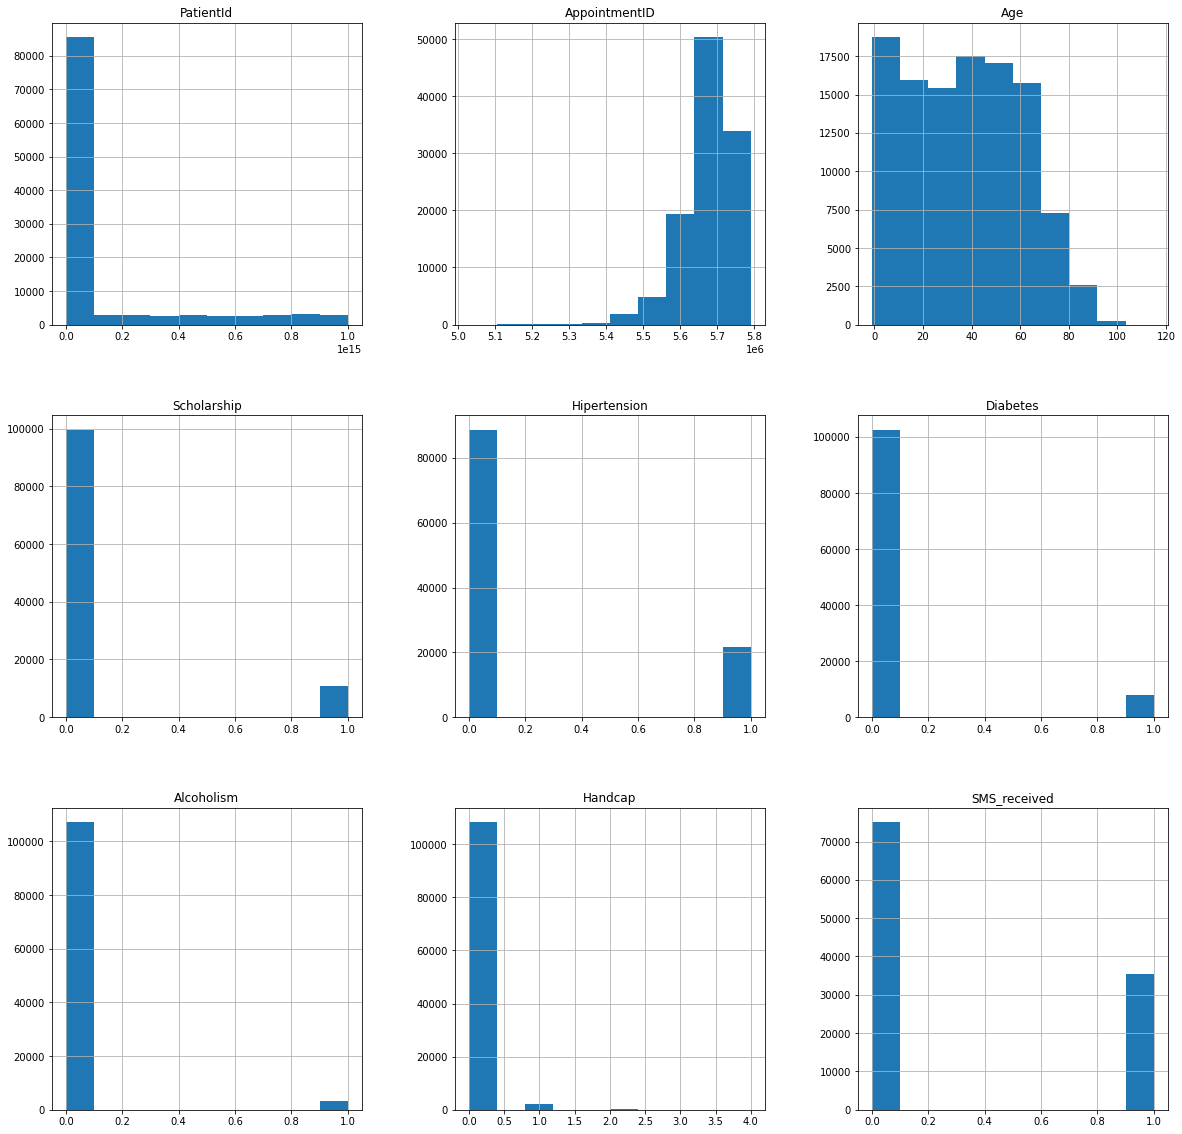

In [11]:
np.random.seed(1100)
# plt.boxplot = data.boxplot(column=['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
#        'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
#        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'])
# sns.boxplot(data)
data.hist(figsize=(20, 20))

$ \bf{AnswerA. 4.}$Count the frequency of negative Age feature observations, and remove them

In [12]:
#finding the index values for the negative number
indexNames = data[ data['Age'] == -1 ].index
print(indexNames)

Int64Index([99832], dtype='int64')


In [13]:
data.drop(indexNames , inplace=True)

In [14]:
#Checking to be sure if the value got removed
data["Age"].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [15]:
#double checking for the value to make sure it got removed
n = data['Age'].unique()
n.sort()
print(n)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [16]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

$\bf{AnswerA. 5.}$ The values within AwaitingTime are negative, transform them into positive values

In [17]:
#calculating AwaitingTime by calculating difference between  AppointmentDay and ScheduledDay 

data.AppointmentDay = pd.to_datetime(data.AppointmentDay)

data.ScheduledDay = pd.to_datetime(data.ScheduledDay)

AwaitingTime = (data.AppointmentDay - data.ScheduledDay)

print(AwaitingTime)
print("Here ")
#converting negative values to positive values
print(abs(AwaitingTime))

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]
Here 
0         0 days 18:38:08
1         0 days 16:08:27
2         0 days 16:19:04
3         0 days 17:29:31
4         0 days 16:07:23
               ...       
110522   34 days 14:44:25
110523   34 days 16:32:27
110524   40 days 07:56:08
110525   40 days 08:50:37
110526   40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]


In [18]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [19]:
data["No-show"].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [20]:
#renaming the name of column for my convenience for label encoding.
df_le= data
df_le.rename(columns = {'No-show': 'No_Show'}, inplace = True)
print(df_le.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_Show'],
      dtype='object')


$ \bf{AnswerA. 6.}$ ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string 
categorical values into an integer code


In [21]:
from sklearn import preprocessing
#copying dataframe
df_le = data

#renaming No-show column for my convenience in calculation in python
df_le.rename(columns={"No-Show": "No_Show"})
le = LabelEncoder()

#Calculating Awaiting time again, this time in inserting as column in Dataframe.
df_le["Awaiting_time"] = (df_le["AppointmentDay"] - df_le["ScheduledDay"])

#converting Awaiting time to seconds for easier calculation
df_le['Awaiting_time'] = df_le['Awaiting_time'].dt.total_seconds()

df_le['Awaiting_time'] = abs(df_le['Awaiting_time'])

print(n)
#carrying out label encoding for the dataframe
l= preprocessing.LabelEncoder()
#encoding only three columns as they are the columns that need to be encoded.
df_le.Neighbourhood = le.fit_transform(df_le.Neighbourhood)
df_le.Gender = le.fit_transform(df_le.Gender)
df_le.No_Show= l.fit_transform(df_le.No_Show)
# print(df_le.Neighbourhood)
# print(df_le.Gender)
print(df_le.No_Show.unique())
print(df_le)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]
[0 1]
           PatientId  AppointmentID  Gender              ScheduledDay  \
0       2.987250e+13        5642903       0 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503       1 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549       0 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828       0 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494       0 2016-04-29 16:07:23+00:00   
...              ...            ...     ...                       ...   
110522  2.572134e+12        5651768       0 2016-05-03 09:15:35+

$ \bf{AnswerA. 7.}$ Break the date features into date components

In [22]:
#breaking only columns ScheduledDay and AppointmentDay in to date time components
df_le['Scheduled_Year'] = pd.to_datetime(df_le['ScheduledDay']).dt.year
df_le['Scheduled_Month'] = pd.to_datetime(df_le['ScheduledDay']).dt.month
df_le['Scheduled_Days'] = pd.to_datetime(df_le['ScheduledDay']).dt.day
df_le['Scheduled_Time'] = pd.to_datetime(df_le['ScheduledDay']).dt.time
df_le['Appointment_Year'] = pd.to_datetime(df_le['AppointmentDay']).dt.year
df_le['Appointment_Month'] = pd.to_datetime(df_le['AppointmentDay']).dt.month
df_le['Appointment_Days'] = pd.to_datetime(df_le['AppointmentDay']).dt.day
df_le['Appointment_Time'] = pd.to_datetime(df_le['AppointmentDay']).dt.time
print(df_le['Appointment_Year'])

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
110522    2016
110523    2016
110524    2016
110525    2016
110526    2016
Name: Appointment_Year, Length: 110526, dtype: int64


In [23]:
#checking data types of each column for normalizing
df_le.dtypes

PatientId                        float64
AppointmentID                      int64
Gender                             int32
ScheduledDay         datetime64[ns, UTC]
AppointmentDay       datetime64[ns, UTC]
Age                                int64
Neighbourhood                      int32
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
No_Show                            int32
Awaiting_time                    float64
Scheduled_Year                     int64
Scheduled_Month                    int64
Scheduled_Days                     int64
Scheduled_Time                    object
Appointment_Year                   int64
Appointment_Month                  int64
Appointment_Days                   int64
Appointment_Time                  object
dtype: object

$ \bf{AnswerA. 8.}$ ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the 
age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score 
standardization) function

In [24]:
# Min- Max normalizing Age column as their values are very large
result = df_le.copy()
for age in df_le.columns:
    max_value = df_le["Age"].max()
    min_value = df_le["Age"].min()
    result["Age"] = (df_le["Age"] - min_value) / (max_value - min_value)
df_le["Age"] = result["Age"]

#Min- Max normalizing Awaiting Time column as their values are very large
for time in df_le.columns:
    max_value_1 = df_le["Awaiting_time"].max()
    min_value_1 = df_le["Awaiting_time"].min()
    result["Awaiting_time"] = (df_le["Awaiting_time"] - min_value_1) / (max_value_1 - min_value_1)
df_le["Awaiting_time"] = result["Awaiting_time"]

print(df_le.Age)
print(df_le.Awaiting_time)


0         0.539130
1         0.486957
2         0.539130
3         0.069565
4         0.486957
            ...   
110522    0.486957
110523    0.443478
110524    0.182609
110525    0.330435
110526    0.469565
Name: Age, Length: 110526, dtype: float64
0         0.003588
1         0.003005
2         0.003047
3         0.003321
4         0.003001
            ...   
110522    0.193241
110523    0.193662
110524    0.225281
110525    0.225493
110526    0.225876
Name: Awaiting_time, Length: 110526, dtype: float64


In [25]:
#double checking to see if columns are normalized in dataframe
print(df_le)

           PatientId  AppointmentID  Gender              ScheduledDay  \
0       2.987250e+13        5642903       0 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503       1 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549       0 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828       0 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494       0 2016-04-29 16:07:23+00:00   
...              ...            ...     ...                       ...   
110522  2.572134e+12        5651768       0 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093       0 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692       0 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323       0 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448       0 2016-04-27 13:30:56+00:00   

                  AppointmentDay       Age  Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00  0.539130       

In [26]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


$ \bf{AnswerA. 9.}$ Conduct variability comparison between features using a correlation matrix & drop correlated features

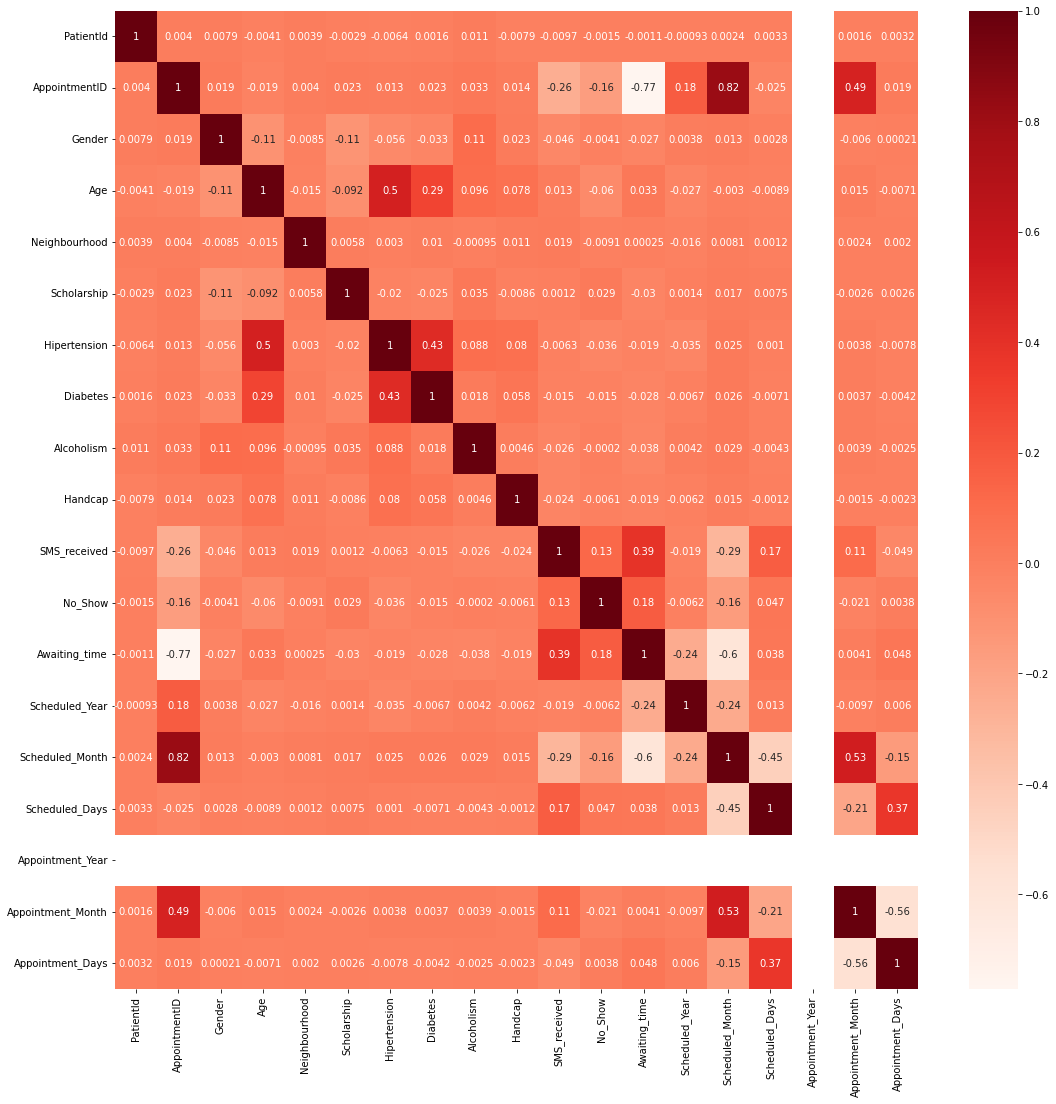

In [27]:
#creating correlation map

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset


plt.figure(figsize=(18,18))
cor = df_le.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
cor_target = abs(cor["No_Show"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features
#these are the only columns that will be used for further calculation as they are the correlated features

AppointmentID      0.162597
SMS_received       0.126428
No_Show            1.000000
Awaiting_time      0.180377
Scheduled_Month    0.160856
Name: No_Show, dtype: float64

In [29]:
df_le.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_Show',
       'Awaiting_time', 'Scheduled_Year', 'Scheduled_Month', 'Scheduled_Days',
       'Scheduled_Time', 'Appointment_Year', 'Appointment_Month',
       'Appointment_Days', 'Appointment_Time'],
      dtype='object')

$ \bf{Answer B.}$ Model Development 

1. Develop a Naïve Bayes classifier to predict the outcome of the test using Python. The performance of
the classifier should be evaluated by partitioning the dataset into a train dataset (70%) and test dataset 
(30%). Use the train dataset to build the Naïve Bayes and the test dataset to evaluate how well the 
model generalizes to future results.

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#Applying Naive Bayes Classifier on the correlated features
X = df_le[["SMS_received","Awaiting_time","Scheduled_Month"]]
# our target column is No_show column.
y = df_le["No_Show"]
#splitting the train and test dataset in 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [31]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 33158 points : 7668


In [31]:
#predicting for future results
predicted_gaussianNB = gnb.predict(X_test)

In [82]:
predicted_gaussianNB_1 = gnb.predict(X_train)

In [32]:
expected_gaussianNB = y_test
print(predicted_gaussianNB)
print(expected_gaussianNB)

[0 0 0 ... 0 0 0]
78500    0
21891    0
89006    0
36681    0
22388    1
        ..
84530    1
15764    0
94360    0
47586    1
8998     1
Name: No_Show, Length: 33158, dtype: int32


$ \bf{Answer C.}$Model Evaluation & Comparison:
1. Write a Function to detect Model’s Accuracy by applying the trained model on a testing dataset to find 
the predicted labels of Status. Was there overfitting?

In [33]:
matches = (predicted_gaussianNB == expected_gaussianNB)
print(matches.sum())

print(len(matches))

matches.sum() / float(len(matches))
#printing the accuracy of the prediction of the Gaussian Naive Bayes model.

25490
33158


0.7687435912901864

In [34]:
from sklearn import metrics
print(metrics.classification_report(expected_gaussianNB, predicted_gaussianNB))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     26565
           1       0.30      0.13      0.18      6593

    accuracy                           0.77     33158
   macro avg       0.56      0.53      0.52     33158
weighted avg       0.71      0.77      0.73     33158



In [83]:
print(metrics.classification_report(y_train, predicted_gaussianNB_1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     61642
           1       0.32      0.13      0.18     15726

    accuracy                           0.77     77368
   macro avg       0.56      0.53      0.52     77368
weighted avg       0.71      0.77      0.73     77368



$ \bf{Answer.}$We can see that the accuracy is good (.77). We can also see that the dataset is imbalanced (f1 scores of 0.87 and 0.18). We can say that the model is not overfitting as training and testing accuracy of model is similar.

In [35]:
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.7687435912901864


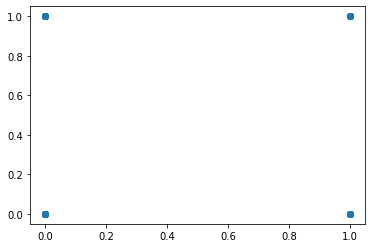

In [36]:
plt.scatter(expected_gaussianNB, predicted_gaussianNB)

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)


In [39]:
nbModel_pred = nbModel_grid.predict(X_test)
print(nbModel_pred)

[0 0 0 ... 0 0 0]


In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, nbModel_pred), ": is the confusion matrix")

con_1 = confusion_matrix(y_test, nbModel_pred)

sensitivity1 = con_1[0,0]/(con_1[0,0]+con_1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = con_1[1,1]/(con_1[1,0]+con_1[1,1])
print('Specificity : ', specificity1)



[[26556     9]
 [ 6591     2]] : is the confusion matrix
Sensitivity :  0.9996612083568606
Specificity :  0.0003033520400424693


In [78]:
print(metrics.classification_report(y_test, nbModel_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26565
           1       0.18      0.00      0.00      6593

    accuracy                           0.80     33158
   macro avg       0.49      0.50      0.45     33158
weighted avg       0.68      0.80      0.71     33158



The accuracy increased to 80% after using Gridsearch, also it has a high  however, the F1 score very low for values of 1, making it difficult for the model to classify. It also has a very high sensitivity score which means it can detect true positives very well.

In [67]:
from sklearn import svm

#Create a svm Classifier
clf1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
SVM_pred = clf1.predict(X_test)

In [74]:
import warnings
warnings.filterwarnings('always')

In [75]:
from sklearn import metrics

print(confusion_matrix(y_test, SVM_pred), ": is the confusion matrix")

con_2 = confusion_matrix(y_test, SVM_pred)

sensitivity1 = con_2[0,0]/(con_2[0,0]+con_2[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = con_2[1,1]/(con_2[1,0]+con_2[1,1])
print('Specificity : ', specificity1)

[[26565     0]
 [ 6593     0]] : is the confusion matrix
Sensitivity :  1.0
Specificity :  0.0


In [77]:
print(metrics.classification_report(y_test, SVM_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26565
           1       1.00      0.00      0.00      6593

    accuracy                           0.80     33158
   macro avg       0.90      0.50      0.44     33158
weighted avg       0.84      0.80      0.71     33158



As we can see that this is a poor model f1 score (average) is acceptable however it can't detect the 1's and further more we can see that in the Specificity score which is 0 meaning that it is very bad at detecting false negatives. It can however detect true positives very well.

In [64]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
text_representation = tree.export_text(clf)
# print(text_representation)
dt_pred = clf.predict(X_test)

In [79]:
from sklearn import metrics

print(confusion_matrix(y_test, dt_pred), ": is the confusion matrix")

con_3 = confusion_matrix(y_test, dt_pred)

sensitivity1 = con_3[0,0]/(con_3[0,0]+con_3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = con_3[1,1]/(con_3[1,0]+con_3[1,1])
print('Specificity : ', specificity1)

[[26505    60]
 [  895  5698]] : is the confusion matrix
Sensitivity :  0.9977413890457368
Specificity :  0.864249962080995


In [72]:
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26565
           1       0.99      0.86      0.92      6593

    accuracy                           0.97     33158
   macro avg       0.98      0.93      0.95     33158
weighted avg       0.97      0.97      0.97     33158



As we can see this model shows excellent results in comparison to the other models wit high f1 scores as well as accuracy and high precision. It also has high sensitivity and specificity scores which means it can detect both false negatives and true positives well (better at detecting true positives as higher Sensitivity score).

In [64]:
%pip install ggplot
import ggplot

C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\threading.py:896: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e794104e80>


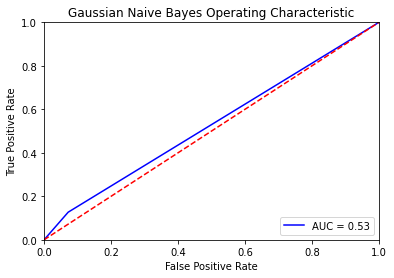

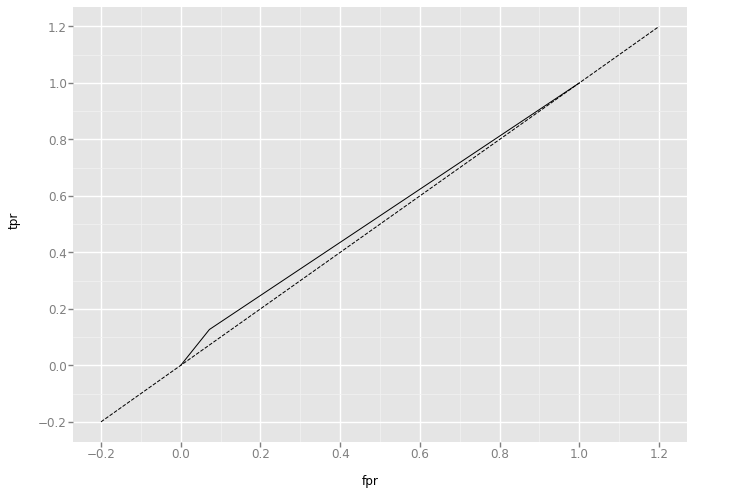

<ggplot: (133037480358)>

In [51]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, predicted_gaussianNB)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Gaussian Naive Bayes Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

This ROC graph of original Naive Bayes classifier is not a good model as we observe from graph and classification report.

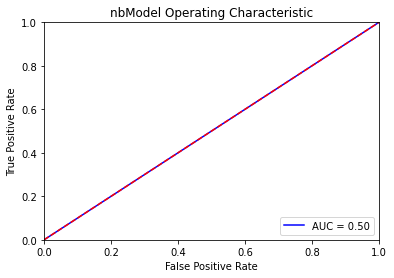

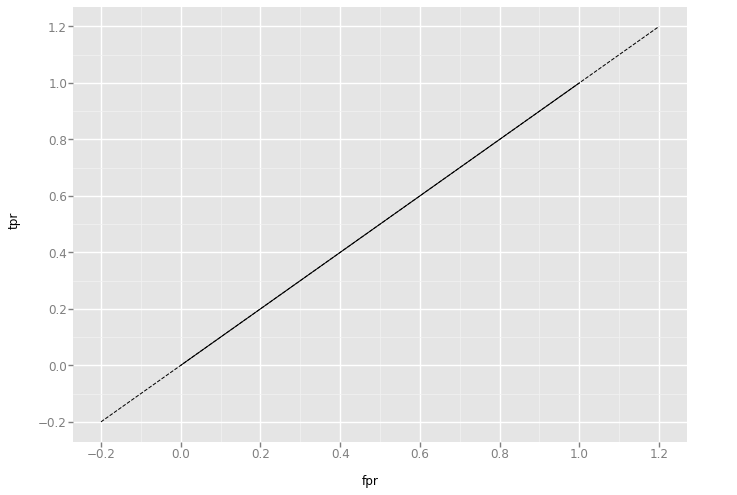

<ggplot: (133015366843)>

In [52]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, nbModel_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('nbModel Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

As we can see from the ROC curve the model performed worse after tuning using GridSearch. 

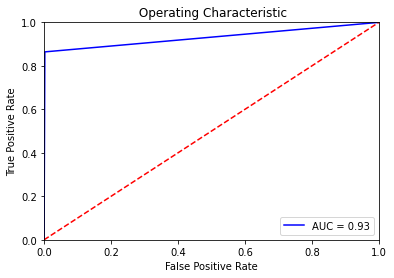

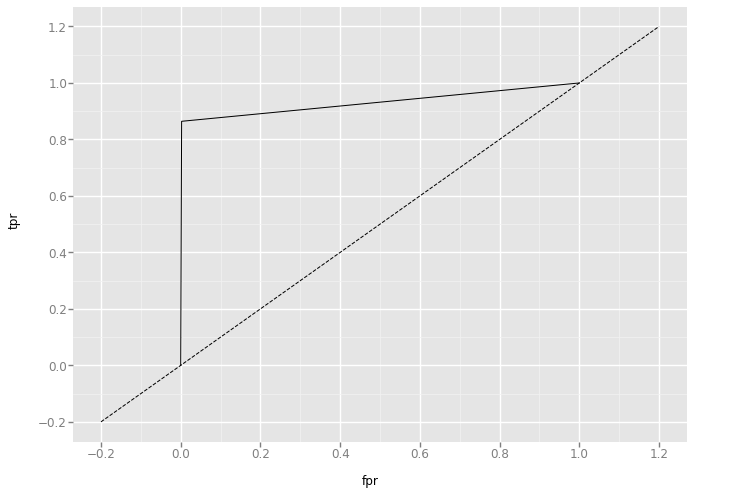

<ggplot: (133015909771)>

In [65]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, dt_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title(' Decision Tree Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

This was the best model in comparison to other models as we can see from the graph that it tips upwards as well as good scores from the classification report.

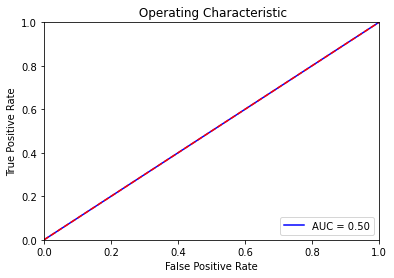

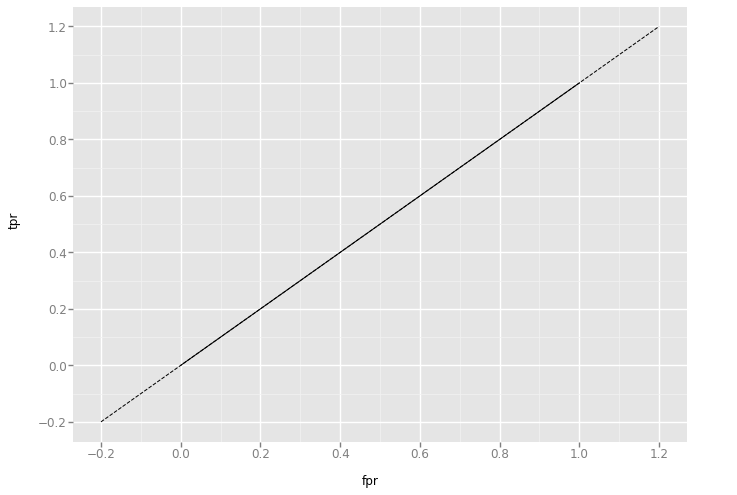

<ggplot: (133015356633)>

In [54]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, SVM_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title(' SVM Model Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

This is the graph of the SVM model, It performs in the same poor way as the tuned GNB model usig Grid Search. It is linear and also based from the classification report, it is not a good model. Therefore, we can say that the best model is the Decision tree model.